In [1]:
#This code run on google colab
#here we need to install the dependencies

!pip install yfinance
!pip install arch
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


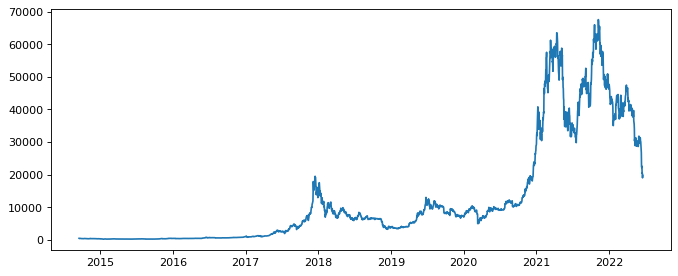

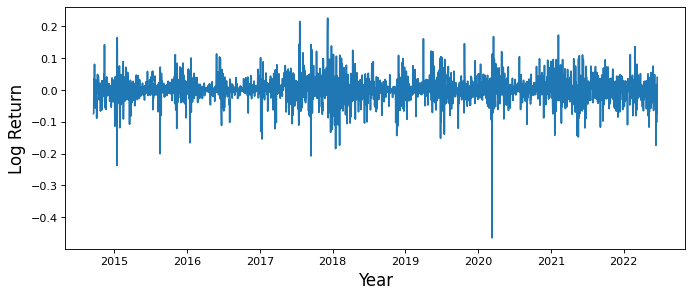

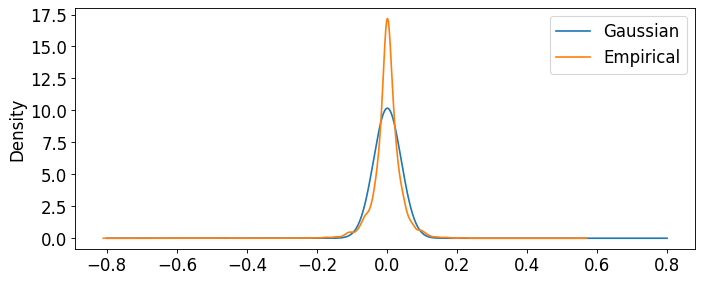

Kurtosis BTC vs FORD   10.823258947411679 13.486483824971451
Skewness  BTC vs FORD -0.7813986083132344 0.030427322458414473


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-06-15,22196.730469,22642.671875,20178.376953,22572.839844,54912007015,0,0
2022-06-16,22576.304688,22868.921875,20265.226562,20381.650391,31183975654,0,0
2022-06-17,20385.718750,21243.312500,20326.519531,20471.482422,27132421514,0,0


In [2]:
#importing libraries and taking data 

import yfinance 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sb
from datetime import datetime  
from datetime import timedelta  
  
plt.rcParams['figure.figsize'] = [10.0, 4.0]
plt.rcParams['figure.dpi'] = 80


data = yfinance.Ticker("BTC-USD")
#data from 2014 is the maximum 
data = data.history(period = "max")

#with this daily library we can retrieve daily data 
#we can take the close price 
close_price = data["Close"]

#we can get return and decide to work with them 
r = np.log(close_price/close_price.shift())   #log return 
R = (close_price/close_price.shift()) - 1
r = r.dropna()

plt.plot(close_price)
plt.show()

plt.plot(r)
#plt.title("Percentage Log Returns of BTC")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Log Return", fontsize=15)
plt.show()




import scipy.stats
#for the moment let's try to use daily data 
#we can try to visualize the density of log returns  
x = np.linspace(-0.8, 0.8, 1000)
dens_norm = [scipy.stats.norm.pdf(i, loc = r.mean(), scale = r.std()) for i in x]
plt.plot(x, dens_norm, label = "Gaussian")
r.plot.density(label = "Empirical", fontsize=15)
plt.legend(prop={'size': 15})
plt.ylabel("Density", fontsize=15)
plt.show()

#kurthosis
print("Kurtosis BTC vs FORD  ", r.kurt(), r_ford.kurt())

#skewness
print("Skewness  BTC vs FORD",r.skew(), r_ford.skew())
data



In [3]:
#lhung box test 

import statsmodels.api as sm

def LjungBox_models(data):
    #fit = m.fit(first_obs = train_set.index[0], last_obs = train_set.tail(1).index, disp ="off")
    #res = fit.resid**2
    test = sm.stats.acorr_ljungbox(data, lags=[i for i in range(10)], return_df=True)
    print(test)

LjungBox_models(r**2)


      lb_stat     lb_pvalue
0  104.258876           NaN
1   42.161729  8.402845e-11
2   47.492462  4.865674e-11
3   50.489065  6.285462e-11
4   64.415659  3.416314e-13
5   69.946648  1.051327e-13
6   74.390647  5.123472e-14
7  102.076192  4.017596e-19
8  103.238070  9.287344e-19
9  104.258876  2.158674e-18


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


[]

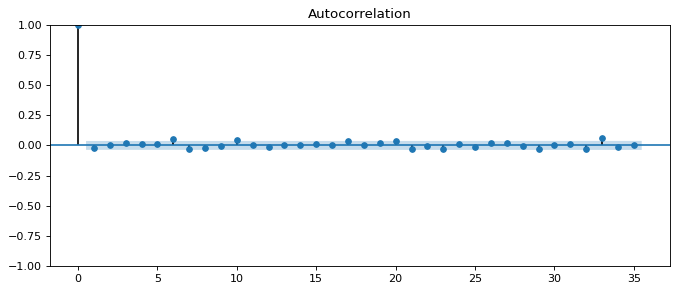

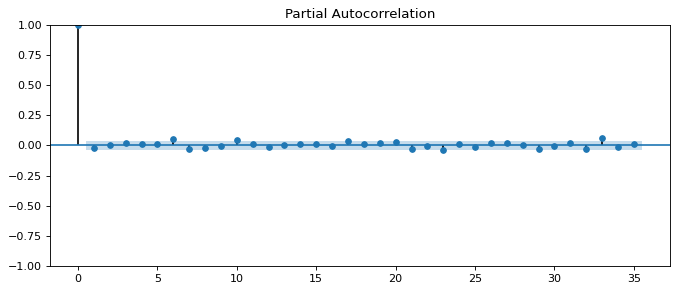

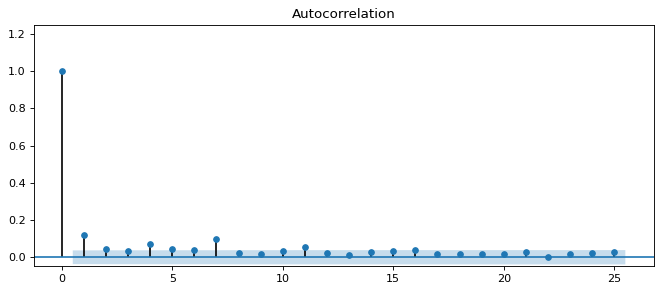

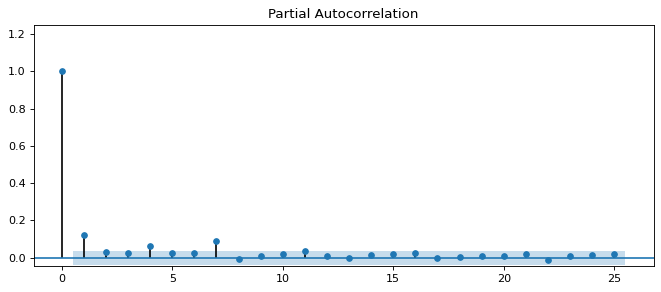

In [4]:
#we can try to see the acf of log return
#and the pacf of log return 
import statsmodels
from google.colab import files
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(r)
plt.plot()

plot_pacf(r)
plt.plot()

# and also we can visualize the acf and pacf of squared of log returns

plot_acf(r**2, lags=25, auto_ylims=True)
plt.plot()

plot_pacf(r**2, lags=25, auto_ylims=True)
plt.plot()




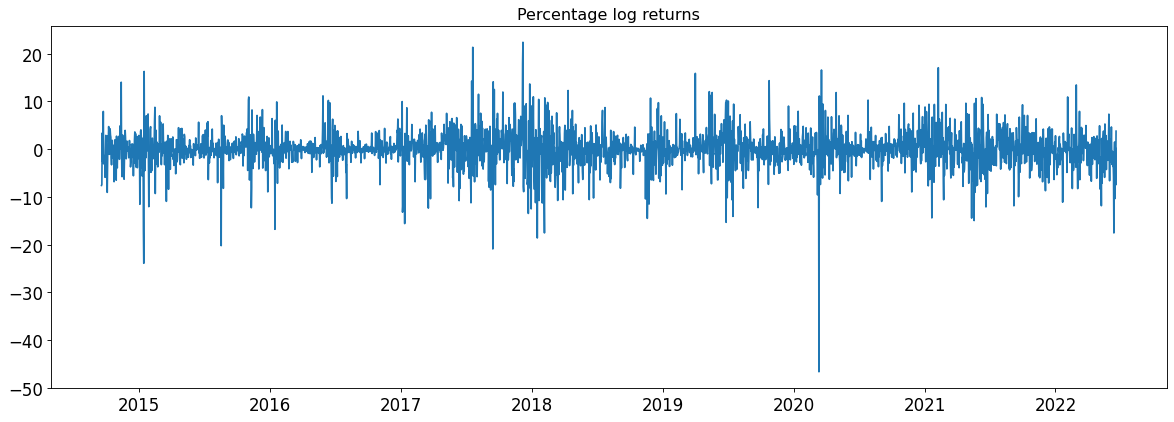

Iteration:      5,   Func. Count:     36,   Neg. LLF: 7671.870909152481
Iteration:     10,   Func. Count:     70,   Neg. LLF: 7668.331561227902
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7668.328801354817
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11



                      Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7668.33
Distribution:                  Normal   AIC:                           15344.7
Method:            Maximum Likelihood   BIC:                           15368.5
                                        No. Observations:                 2832
Date:                Sun, Jun 19 2022   Df Residuals:                     2831
Time:     

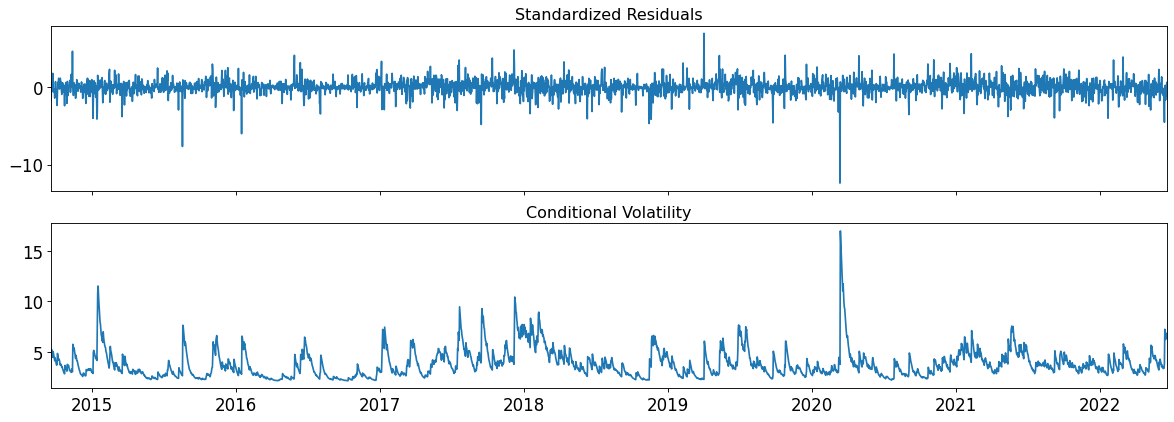

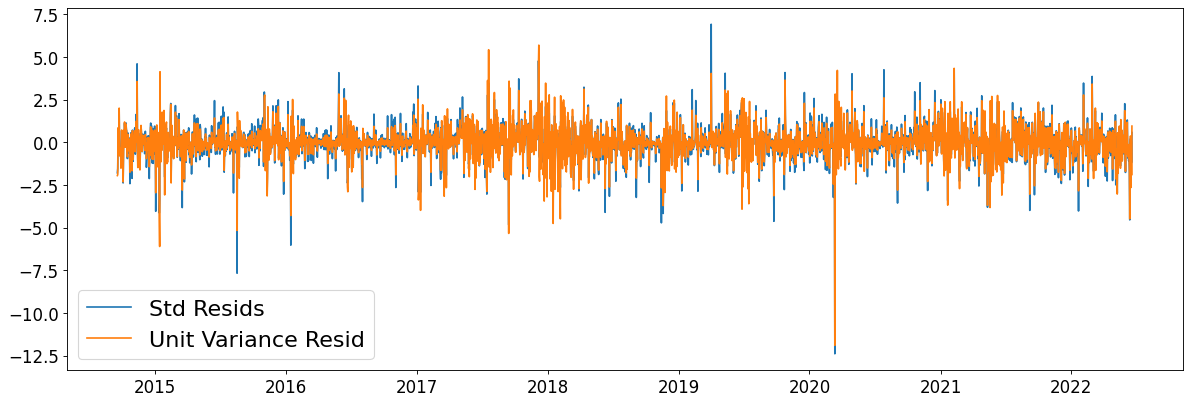

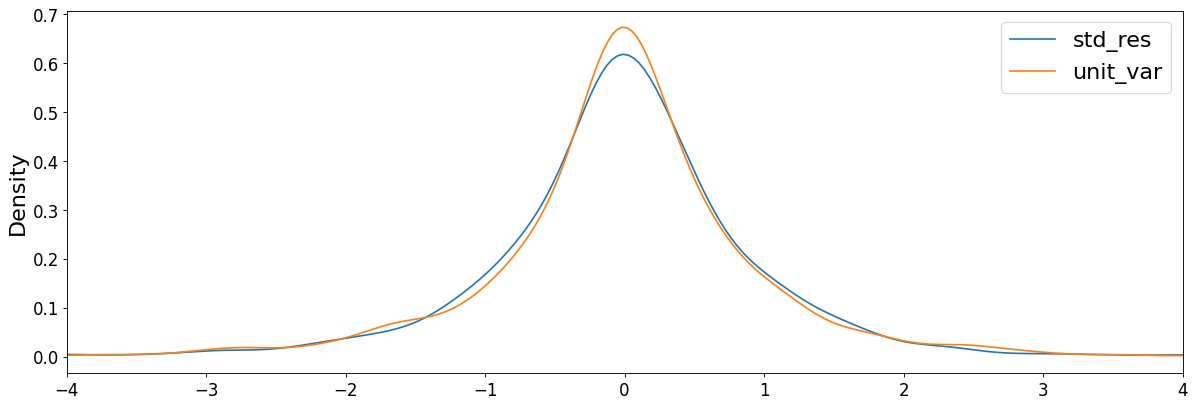

In [28]:
#we can just apply a simple garch model to the series and see what happen 
import arch 
from arch.__future__ import reindexing


#percentage log return 
perc_r = r*100 - r.mean()*100
plt.plot(perc_r)
plt.title("Percentage log returns")
plt.show()


#EXAMPLE OF ONE MODEL 

garch11_t = arch.arch_model(perc_r, p = 1, q = 1, dist = "Normal")
m_fit = garch11_t.fit(update_freq=5)
print("\n\n\n", m_fit.summary())

m_fit.plot()
plt.show()


#confronting standardized residuals using conditional volatility and using fixed volatility 
std_resid = m_fit.resid / m_fit.conditional_volatility
unit_var = m_fit.resid / m_fit.resid.std()
plt.plot(std_resid, label= "Std Resids")
plt.plot(unit_var, label = "Unit Variance Resid")
plt.legend()
plt.show()

#we can also see the density 
res = pd.concat([std_resid, unit_var],axis = 1)
res.columns = ["std_res", "unit_var"]
res.plot(kind = "kde", xlim=(-4,4))
plt.show()

In [6]:
#downloading and calculating variance from intraday data 
#this code run on google colab and take data from google drive 

intra_day_gemini = pd.read_csv('/content/drive/MyDrive/BITCOIN DATA/gemini_new.csv')
intra_day_gemini_1h = pd.read_csv('/content/drive/MyDrive/BITCOIN DATA/Gemini_BTCUSD_1h.csv')


#calculating the realized volatility 
def intra_day_vol_gem(dataset):
    names = dataset.columns.to_list()
    for j in range(len(names)):
      names[j] = names[j].lower()

    dataset.columns = names 
    dataset['date'] = pd.to_datetime(dataset['date'])
    dataset = dataset.set_index(dataset.date)
    dataset = dataset.assign(ret = 100 * np.log(dataset.close.shift(1) / dataset.close))
    
    
    def real_vol(s):
        r_2 = (s-s.mean())**2
        n = 1
        return np.sqrt(r_2.sum()/n)

    real_vol = dataset.ret.resample("D").apply(real_vol)
    return real_vol 


gemini_1m = intra_day_vol_gem(intra_day_gemini)
gemini_1h = intra_day_vol_gem(intra_day_gemini_1h)



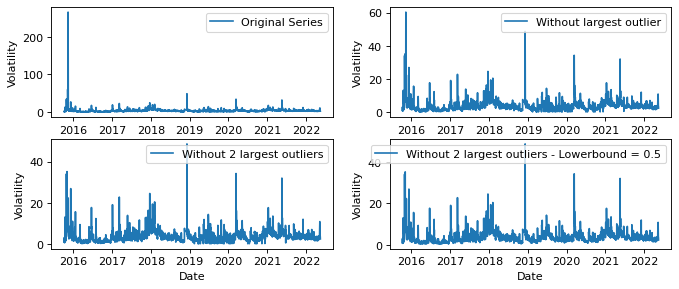

In [7]:
from datetime import timedelta  

#function created to get the precedent date given a date 
def  get_precedent(date_list):
      prec_date = []
      for j in date_list:
        prec_date.append(j - timedelta(days=1) )
      return prec_date


#remove two outliers from the gemini series of volatility needed for minute data 
#we remove the n-largest observation, and put a lower bound for volatility to remove the observation that are 0, or small 

def remove_outliers(data, n, *low_bound):
    
    #removing outliers : large values 
    index_to_remove = data.nlargest(n).index
    prec_index = get_precedent(index_to_remove)
    gemini_to_sub = data.loc[data.index.isin(prec_index)]
    res = data.copy()
    res.loc[data.index.isin(index_to_remove)] = gemini_to_sub.values
    
    #if low_bound we take values from the past gradually 
    #if we found index that correspond to values smaller than low bound we take the previous 
    c = 0 
    if low_bound:
        while (res <= low_bound ).sum() != 0:                           
          index_zero = (res.iloc[(res <= low_bound ).values]).index
          prec = get_precedent(index_zero)
          gemini_to_sub = res.loc[res.index.isin(prec)]
          res.loc[data.index.isin(index_zero)] = gemini_to_sub.values
          c += 1
          
    return res


def MAE(fitted, real):
    abs_series = (fitted-real).abs()
    return abs_series.mean()

def MSE(fitted, real):
    square_series = (fitted-real).pow(2)
    return square_series.mean()




import matplotlib.pylab as pylab

fig, axs = plt.subplots(2, 2)

axs[0,0].plot(remove_outliers(gemini_1m,0,0), label = "Original Series")
axs[0,1].plot(remove_outliers(gemini_1m,1,0), label = "Without largest outlier")
axs[1,0].plot(remove_outliers(gemini_1m,2,0), label = "Without 2 largest outliers")
axs[1,1].plot(remove_outliers(gemini_1m,2,0.5),  label = "Without 2 largest outliers - Lowerbound = 0.5")
for ax in axs.flat:
    ax.set(xlabel="Date", ylabel='Volatility')
    ax.legend()

    
#visualizing how the intra 1m series change removing outliers and small values 



In [8]:
#####################################àà#### GJR - GARCH ##############################################################
#let's start from the heat map given by using AIC and BIC with different dsitributions 

#train sets
train_set = perc_r.loc[perc_r.index < "2021-01-01"]
train_real = gemini_1h.loc[gemini_1h.index < "2021-01-01"] 
train_1h =  gemini_1h.loc[gemini_1h.index < "2021-01-01"]
train_1m =   gemini_1m.loc[gemini_1h.index < "2021-01-01"]


n_obs_to_avoid = 0                                         #if minute data uses 2, if hourly data use 0 


#visualize the fitting of a model on conditional realized volatility 
def visual(fit, n_out = n_obs_to_avoid):
    gem_index = train_real.index            #implement to take data till last date     
    fitted_garch = fit.conditional_volatility.loc[(m_fit.conditional_volatility).notnull()]
    fitted_garch = fitted_garch.loc[fitted_garch.index.isin(gem_index.to_list())]
    plt.plot(remove_outliers(train_real,2))
    plt.plot(fitted_garch, label = "Fitted")
    loss_text = f"INTRADAY:  MSE: {MSE(fitted_garch, remove_outliers(train_real,2))}  MAE: {MAE(fitted_garch, remove_outliers(train_real,2))}"
    plt.legend()
    plt.title(loss_text)
    plt.show()

#this function take aic and bic for a model 
def info_gjr_garch(data, p,q, distribution):
    garch = arch.arch_model(data, p = p, o=1, q = q, dist = distribution)
    fit = garch.fit(update_freq=0, disp="off")
    return fit.aic, fit.bic

#does the same for a garch model 
def info_garch(data, p,q, distribution):
    garch = arch.arch_model(data, p = p, q = q, dist = distribution)
    fit = garch.fit(update_freq=0, disp="off")
    return fit.aic, fit.bic


#function to plot the heatmap 
def heat(data, distribution, function_model):
    p = [i for i in range(6,0,-1)]
    q = [j for j in range(1,7)]
    aic_heat = pd.DataFrame(index = p, columns = q, dtype="float")
    bic_heat = pd.DataFrame(index = p, columns = q, dtype="float")

    aic_heat.index = aic_heat.index.rename("p")
    aic_heat.columns = aic_heat.columns.rename("q")

    bic_heat.index = bic_heat.index.rename("p")
    bic_heat.columns = bic_heat.columns.rename("q")
    
    for p_par in p:
        for q_par in q:
            fitted = function_model(data, p_par, q_par, distribution)
            aic_heat.loc[p_par, q_par] = fitted[0]
            bic_heat.loc[p_par, q_par] = fitted[1]
                                                  

    sb.heatmap(aic_heat, cmap="Reds", robust = True, square = False)
    plt.title(f"AIC - {distribution}")
    plt.show()        
    sb.heatmap(bic_heat, cmap="Reds", robust = True, square = False)
    plt.title(f"BIC - {distribution}")
    plt.show()

    m_aic = aic_heat.min().min()
    m_bic = bic_heat.min().min()

    return [[aic_heat.where(aic_heat == m_aic).dropna(how="all").dropna(axis=1).index.values.item() , 
            aic_heat.where(aic_heat == m_aic).dropna(how="all").dropna(axis=1).columns.values.item()],
            [bic_heat.where(bic_heat == m_bic).dropna(how="all").dropna(axis=1).index.values.item() ,
             aic_heat.where(bic_heat == m_bic).dropna(how="all").dropna(axis=1).columns.values.item()]]



#function to observe realized versus fitted 

def observe_fitted_realized(fit_model, perc_r,vol = True):   #vol is volatility 
    if not vol:  #variance
        gem_index = train_real.index            #implement to take data till last date     
        fitted_garch = fit_model.conditional_volatility.loc[(fit_model.conditional_volatility).notnull()]
        fitted_garch = fitted_garch.loc[fitted_garch.index.isin(gem_index.to_list())]
        real = (train_set.loc[(train_set.index.isin(gem_index))])**2

        plt.plot(real, label = "Realized")
        plt.plot(fitted_garch**2, label = "Fitted")
        plt.legend()
        plt.title(f"PROXY:   MSE: {MSE(real, fitted_garch**2)} MAE: {MAE(real, fitted_garch**2)}")
        plt.show()

    else:
      #volatility
        gem_index = train_real.index            #implement to take data till last date     
        fitted_garch = fit_model.conditional_volatility.loc[(fit_model.conditional_volatility).notnull()]
        fitted_garch = fitted_garch.loc[fitted_garch.index.isin(gem_index.to_list())]
        real = train_set.loc[(train_set.index.isin(gem_index))].abs()
        plt.plot(real, label = "Realized")
        plt.plot(fitted_garch, label = "Fitted")
        plt.legend()
        plt.title(f"PROXY:   MSE: {MSE(real, fitted_garch)} MAE: {MAE(real, fitted_garch)}")
        plt.show()


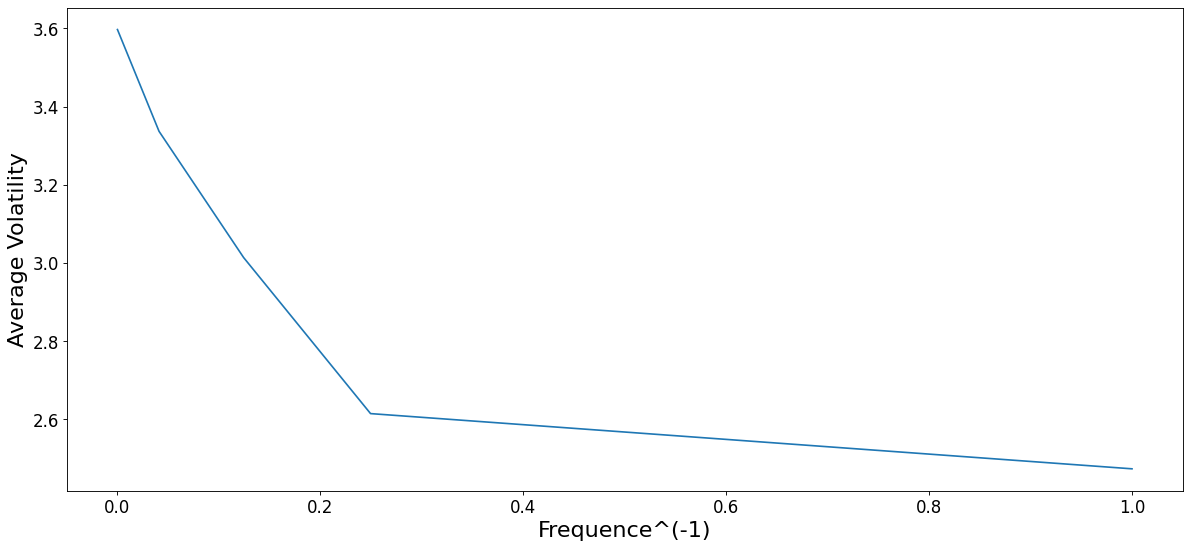

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

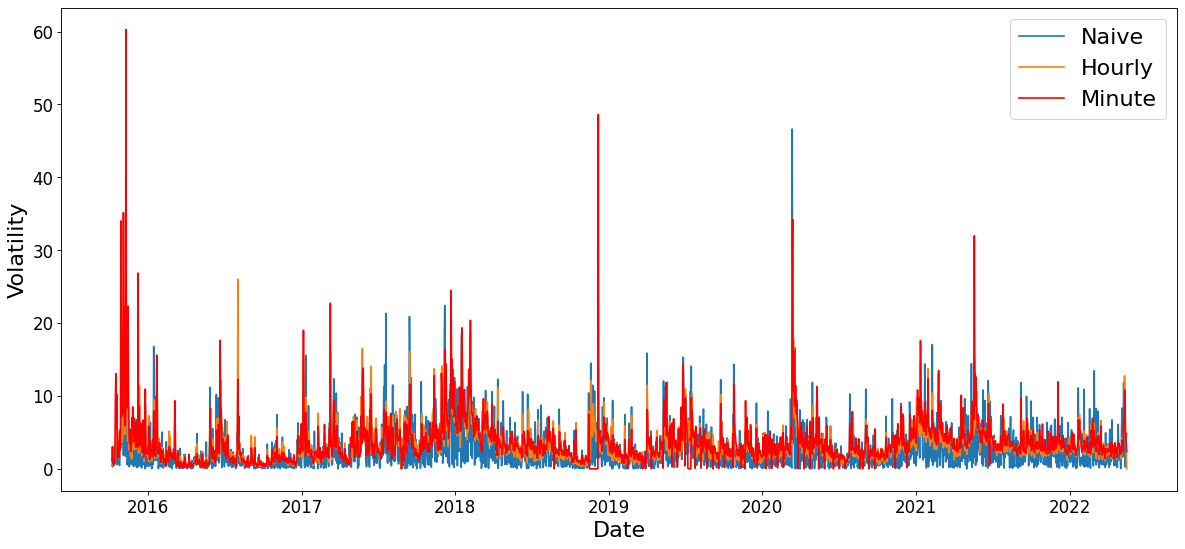

In [21]:
#signature plot

#function to estimate the realized volatility using difference frequencies for the realized volatility 
def intra_day_vol_gem_more_data(dataset = intra_day_gemini_1h, freq="3H"):
    names = dataset.columns.to_list()
    for j in range(len(names)):
      names[j] = names[j].lower()

    dataset.columns = names 
    dataset['date'] = pd.to_datetime(dataset['date'])
    dataset = dataset.set_index(dataset.date)
    dataset = dataset.assign(ret = 100 * np.log(dataset.close.shift(1) / dataset.close))
    dataset = dataset.resample(freq).sum()
    
    
    def real_vol(s):
        r_2 = (s-s.mean())**2
        n = 1
        return np.sqrt(r_2.sum()/n)

    real_vol = dataset.ret.resample("D").apply(real_vol)
    return real_vol 


_3h_test = intra_day_vol_gem_more_data()
_6h_test = intra_day_vol_gem_more_data(dataset = intra_day_gemini_1h, freq="6H")


#function to create signature plot 
def signature_plot(download = False):
    minute_f = 1/(60*24)
    three_hour = 1/(24/3)
    six = 1/4
    hour_f = 1/(24)
    daily_f = 1

    x = [minute_f, hour_f, three_hour, six, daily_f]
    y = [remove_outliers(gemini_1m,2).mean(), gemini_1h.mean(), _3h_test.mean(),_6h_test.mean(),train_set.abs().mean()]

    plt.plot(x,y)
    plt.ylabel("Average Volatility")
    plt.xlabel("Frequence^(-1)")
    if download:
          plt.savefig('sig.png', dpi = 120, bbox_inches='tight')
          files.download("sig.png")
    plt.show()

signature_plot(download = False)

plt.plot(perc_r[perc_r.index.isin(gemini_1h.index)].abs(), label = "Naive")

plt.plot(gemini_1h, label = "Hourly")
plt.plot(remove_outliers(gemini_1m,1), label = "Minute", color = "red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.savefig('intravol.png', dpi = 80, bbox_inches='tight')
files.download("intravol.png")
plt.show()

In [22]:
#function for forecastig in rollwing windows
def future_times(h,data):
  date = []
  for i in range(0,h):
        date.append(data + timedelta(i+1))
  return date 

#estimate the volatility in rolling windows

def roll(data, model, window, h, method = "Simulation"):
  
  forecast_roll = pd.DataFrame(columns = ["date", "vol"], index = [i for i in range(365+5)]) #define a empty dataframe 
  c = 0 
  for j in range(0,len(data.index),h): #- window):  
        init = data.index[j] - timedelta(1)  #first date
        end = init + timedelta(days=window)   #last date 
        fitted = model.fit( options={'maxiter': 500}, first_obs = init, last_obs = end, disp = "off")  #fitting the model 
    
     
        if h > 1:        
             
         
            forecast = fitted.forecast(horizon=h, reindex=False, method = method).variance
            forecast_roll.loc[j:j+h-1,"date"] =  future_times(h,end)
            print( future_times(h,end))
            forecast_roll.loc[j:j+h-1,"vol"] = np.array(forecast.iloc[0,0:(h)].values)**(0.5)
           
        else:

            forecast = fitted.forecast(horizon=h, reindex=False).variance
            forecast_roll.loc[j,"date"] = end + timedelta(days=1)    
         
            forecast_roll.loc[j,"vol"] = (forecast.iloc[0].values.item())**(0.5)



  forecasted_series = forecast_roll.set_index("date") 
  name = fitted.model.volatility
  distribution = fitted.model.distribution
  

  return f"{name}", f"{distribution}", forecasted_series.dropna()
    

In [23]:
#function that create the table with the performance out of sample of models in list models 

def create_tab(list_models, window, h, method = "Bootstrap"):
    
    df = pd.DataFrame(columns = ["Model", "Distribution", "Proxy MSE", "Proxy MAE", "Intra-1m MSE", "Intra-1m MAE", "Intra-1h MSE", "Intra-1h MAE"], index = [i for i in range(len(list_models))])
    series_list = []
    
    end_date = datetime.strptime("2022-01-01", "%Y-%m-%d") - timedelta(days=window)
    start_date = datetime.strptime("2021-01-01", "%Y-%m-%d") - timedelta(days=window)
    validation_set = perc_r.loc[perc_r.index < end_date]
    validation_set = validation_set.loc[validation_set.index >= start_date]
    
    for j, m in enumerate(list_models):

        name, dist, series = roll(validation_set, m, window, h, method)
        print(f"{j+1}-{len(list_models)}")
        df.loc[j, "Model"] = name
        df.loc[j, "Distribution"] = dist

        if j == 0:
             
              real_data = perc_r.loc[perc_r.index.isin(series.index)].abs().reset_index().Close
              minute = remove_outliers(gemini_1m,2, 0.5)
              intra_m = minute.loc[minute.index.isin(series.index)].reset_index().ret
              intra_h = gemini_1h.loc[gemini_1h.index.isin(series.index)].reset_index().ret
        
        series_list.append(series)
        series = series.reset_index().vol
        
        df.loc[j,"Proxy MAE"] = MAE(series, real_data)
        df.loc[j,"Proxy MSE"] = MSE(series, real_data)
        df.loc[j, "Intra-1m MSE"] = MSE(series, intra_m)
        df.loc[j, "Intra-1h MSE"] = MSE(series, intra_h)
        df.loc[j, "Intra-1m MAE"] = MAE(series, intra_m)
        df.loc[j, "Intra-1h MAE"] = MAE(series, intra_h)
     
     
    return df, series_list 



In [25]:
#defining all model that we desire to test on the validation set 

def all_model(max_p, max_q):
  
  model_list =[]
  o = 0
  model_type = ["GARCH", "GJR-GARCH", "EGARCH"]
  dist = ["Normal", "StudentsT", "SkewStudent"]
  for mod in model_type:
   
    if mod == "GJR-GARCH":
       mod = "GARCH"
       o = 1
    
    if mod == "EGARCH":
       o = 1        

    
    for distribution in dist: 
      for p in range(1,max_p+ 1):
        for q in range(1,max_q + 1):
          
          m =  arch.arch_model(perc_r, vol=mod, p=p, q=q, o = o, dist = distribution)
          model_list.append(m)


  return model_list 
  

ListAllModel = all_model(4,4)

tab, series_list = create_tab(ListAllModel, 800, 1)
tab.to_csv("outofsample_h1_600.csv")



#select the best models to use 
#create the table with the best models for each columns
def bestmodels(tab):
    ind = []
    col = ["Proxy MSE", "Proxy MAE", 
           "Intra-1h MSE", "Intra-1h MAE"]
    col_ret = ['Model', 'Distribution', 'Proxy MSE', 'Proxy MAE','Intra-1h MSE', 'Intra-1h MAE']
    for c in col:
        
        index =  tab.loc[:,c].astype("float64").argmin()
       
        # if index not in ind:
        ind.append(index)
    
    best = tab.iloc[ind,0:]
    best2 = best.loc[:,col_ret]
    #best2 = best2[col].round(3)
    return best2



In [ ]:

def create_tab_test(list_models, window, h, method = "Bootstrap"):
    
    df = pd.DataFrame(columns = ["Model", "Distribution", "Proxy MSE", "Proxy MAE", "Intra-1h MSE", "Intra-1h MAE"], index = [i for i in range(len(list_models))])
    series_list = []
    
    end_date = datetime.strptime("2022-05-15", "%Y-%m-%d") - timedelta(days=window)
    
    start_date = datetime.strptime("2022-01-01", "%Y-%m-%d") - timedelta(days=window)
    test = perc_r.loc[perc_r.index <= end_date]
    test = test.loc[test.index >= start_date]
    
    for j, m in enumerate(list_models):
        
        # if j == 2:
        #   method = "Simulation"

        name, dist, series = roll(test, m, window, h, method)
        print(f"{j}-{len(list_models)}")
        df.loc[j, "Model"] = name
        df.loc[j, "Distribution"] = dist

        if j == 0:
             
              real_data = perc_r.loc[perc_r.index.isin(series.index)].abs().reset_index().Close
              minute = remove_outliers(gemini_1m,2, 0.5)
              intra_h = gemini_1h.loc[gemini_1h.index.isin(series.index)].reset_index().ret
        
        series_list.append(series)
        series = series.reset_index().vol
        
        df.loc[j,"Proxy MAE"] = round(MAE(series, real_data),3)
        df.loc[j,"Proxy MSE"] = round(MSE(series, real_data),3)
        
        df.loc[j, "Intra-1h MSE"] = round(MSE(series, intra_h),3)
        df.loc[j, "Intra-1h MAE"] = round(MAE(series, intra_h),3)
     
     
    return df, series_list, 



garch11 = arch.arch_model(perc_r, vol="GARCH", p=1, q=1, o = 0, dist = "Normal")
gjrgarch31 = arch.arch_model(perc_r, vol="GARCH", p=3, q=1, o = 1, dist = "Normal")
gjrgarch41 = arch.arch_model(perc_r, vol="GARCH", p=4, q=1, o = 1, dist = "Normal")
egarch31 = arch.arch_model(perc_r, vol="EGARCH", p=3, q=1, o = 1, dist = "Normal")
egarch21 = arch.arch_model(perc_r, vol="EGARCH", p=2, q=1, o = 1, dist = "Normal")


#best models for each horizon 
mod_test_h1 = [garch11, gjrgarch31, egarch21 ]
mod_test_h2 = [garch11, gjrgarch41, egarch31]

tab_test_h1 = create_tab_test(mod_test_h1, 1000, h=1)
tab_test_h2 = create_tab_test(mod_test_h2, 1000, h=2)



#plotting the result obtained 

vol_hourly = gemini_1h.loc[gemini_1h.index <= "2022-05-15"]
vol_hourly = vol_hourly.loc[vol_hourly.index >= "2022-01-01"]
date = (vol_hourly.index)

plt.plot(vol_hourly, label = "Realized 1h Volatility")
plt.xticks([date[j] for j in range(0,len(date), 18)])
for j in range(3):
      plt.plot(date, tab_test_h2[1][j][:-1], label = f"{mod_test_h2[j].volatility}-{mod_test_h2[j].distribution}")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Volatility")

plt.savefig("h2.png", bbox_inches='tight')
files.download("h2.png")

